In [43]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [49]:
# Read CSV file
df = pd.read_csv('final_means.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              841 non-null    object 
 1   AirParif_pm10     841 non-null    float64
 2   AirParif_pm2p5    841 non-null    float64
 3   Copernicus_pm10   841 non-null    float64
 4   Copernicus_pm2p5  841 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.0+ KB


In [45]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'date' column as the index
df = df.set_index('Date')

# Resample the time series data with a daily frequency
df = df.asfreq('D')

# Handle missing values
df = df.dropna()
df

,AirParif_pm10,AirParif_pm2p5,Copernicus_pm10,Copernicus_pm2p5
Date,,,,
2020-01-09,23.800000,7.963636,12.476818,4.857273
2020-01-10,12.250000,6.895833,18.830833,15.625000
2020-01-11,4.912500,2.254167,29.809583,23.437500
2020-01-12,15.833333,8.762500,17.227083,7.631250
2020-02-09,28.040000,11.193333,11.491333,5.676000
...,...,...,...,...
2022-12-27,15.958333,10.045833,13.405417,8.491667
2022-12-28,9.500000,6.662500,8.426667,4.426667
2022-12-29,13.325000,7.262500,13.091250,5.922500


In [46]:
pm10_series = df['Copernicus_pm10']
orders_to_try = [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2)]
best_mse = float('inf')
best_model = None

for order in orders_to_try:
    model = ARIMA(pm10_series, order=order)
    results = model.fit()
    predictions = results.predict()
    mse = ((pm10_series[1:] - predictions)**2).mean()

    if mse < best_mse:
        best_mse = mse
        best_model = model

# Print the best model's order
print("Best ARIMA Model Order:", best_model.order)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

Best ARIMA Model Order: (1, 1, 2)


In [47]:
model = ARIMA(pm10_series, order=(1, 1, 2))
results = model.fit()

predictions = results.predict()
mae = mean_absolute_error(pm10_series, predictions)
accuracy = 1 - mae/pm10_series.mean()
accuracy

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


0.7106504377584864

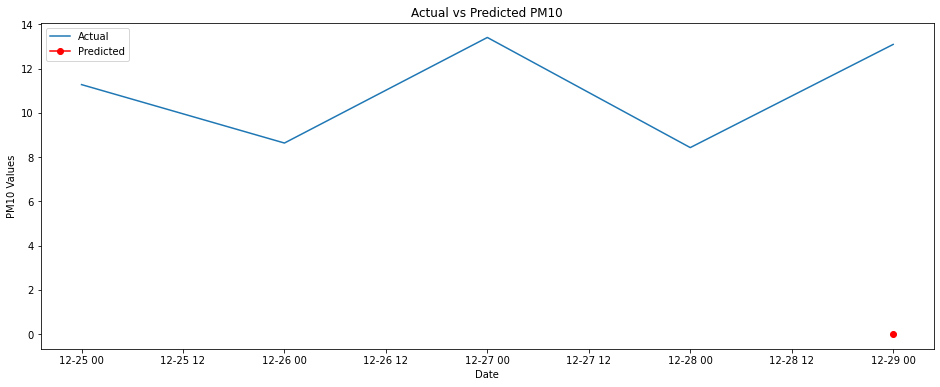

In [48]:
import matplotlib.pyplot as plt

# Extract data for the last 3 months
last = pm10_series.loc['2022-12-25':'2022-12-29']

plt.figure(figsize=(16, 6))  

# Visualize the actual vs predicted values
plt.plot(last.index, last, label='Actual')

# Use the same index for the predicted values
plt.plot(last.index[-1], predictions.values[0], marker='o', color='red', label='Predicted')

plt.title('Actual vs Predicted PM10')
plt.xlabel('Date')
plt.ylabel('PM10 Values')
plt.legend()
plt.show()
